


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


In [61]:
# Importando as bibliotecas.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
# Carregando os dados.
try:   
    df_orders = pd.read_csv(r'/datasets/instacart_orders.csv',sep=';')
    df_products = pd.read_csv(r'/datasets/products.csv',sep=';')
    df_aisles = pd.read_csv(r'/datasets/aisles.csv',sep=';')
    df_departments = pd.read_csv(r'/datasets/departments.csv',sep=';')
    df_op = pd.read_csv(r'/datasets/order_products.csv',sep=';')
except:
    df_orders = pd.read_csv(r"C:\ArquivosP\Arquivos - P3\instacart_orders.csv",sep=';')
    df_products = pd.read_csv(r"C:\ArquivosP\Arquivos - P3\products.csv",sep=';')
    df_aisles = pd.read_csv(r"C:\ArquivosP\Arquivos - P3\aisles.csv",sep=';')
    df_departments = pd.read_csv(r"C:\ArquivosP\Arquivos - P3\departments.csv",sep=';')
    df_op = pd.read_csv(r"C:\ArquivosP\Arquivos - P3\order_products.csv",sep=';')

In [63]:
# Carregando as informações e uma amostra da tabela orders.
df_orders.info()
df_orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
329107,2837134,107478,47,5,14,2.0
111420,3312089,11455,14,4,15,7.0
24332,1500374,125481,11,0,23,6.0
222868,386508,18488,20,6,10,5.0
280100,2431938,132363,50,1,17,7.0


In [64]:
# Carregando as informações e uma amostra da tabela products.
df_products.info()
df_products.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
33885,33886,Teriyaki Roasted Seaweed Snacks,66,6
47231,47232,Cultured Unsweetened Vanilla Coconut Milk,91,16
30905,30906,Spicy Tuscan Tomato Sauce,9,9
47,48,School Glue- Washable- No Run,87,17
28744,28745,Oven Roasted Turkey,96,20


In [65]:
# Carregando as informações e uma amostra da tabela aisles.
df_aisles.info()
df_aisles.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
57,58,frozen breads doughs
73,74,dish detergents
91,92,baby food formula
112,113,frozen juice
92,93,breakfast bakery


In [66]:
# Carregando as informações e uma amostra da tabela departments.
df_departments.info()
df_departments.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
5,6,international
12,13,pantry
3,4,produce
17,18,babies
13,14,breakfast


In [67]:
# Carregando as informações e uma amostra da tabela op.
df_op.info(show_counts=True)
df_op.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
3098256,3207713,34943,6.0,1
2258327,1135530,24699,12.0,0
2675177,1840964,20127,14.0,0
3958441,1481703,29615,3.0,1
3834224,2324215,45368,3.0,0


# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

- Verificar duplicados com 'duplicated' e removê-los com 'drop_duplicates'
- Verificar ausentes com 'isna' e preenchê-los com 'fillna'



## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [68]:
# Verificando se há pedidos duplicados.
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Há linhas duplicadas? Se sim, o que elas têm em comum?

``Há 15 linhas duplicadas e todas elas são de pedidos feitos as 2h da manhã na quarta-feira.``

In [69]:
# Verificando todos os pedidos feitos às 2h da manhã nas quartas-feira.
df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


O que esse resultado quer dizer?

``Existem pedidos duplicados na quarta-feira as 2 horas da manhã, porém também há pedidos feitos no mesmo dia e na mesma hora que não estão duplicados.Dessa forma, esses pedidos duplicados podem ser erros de uma quarta feira específica do mês, e não se aplica a todas as quartas feiras.``


In [70]:
# Removendo pedidos duplicados.
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [71]:
# Verificando as linhas duplicadas mais uma vez.
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [72]:
# Verificando novamente apenas os IDs de pedidos duplicados.
df_orders['order_id'].duplicated().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

``Haviam 15 linhas duplicadas relacionadas a um dia específico da semana juntamente com um horário específico. Apenas removi essas duplicidades e em seguida arrumei a indexação do dataframe.``

### DataFrame `products`

In [73]:
# Verificando se há linhas completamente duplicadas.
df_products[df_products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [74]:
# Verificando se há apenas IDs dos produtos duplicados.
df_products[df_products.duplicated(subset=['product_id',])]

,product_id,product_name,aisle_id,department_id


In [75]:
# Verificando se há apenas nomes de produtos duplicados (convertendo os nomes para minúsculas para uma comparação melhor).
df_products['product_name'] = df_products['product_name'].str.lower()
df_products[df_products.duplicated(subset='product_name')]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [76]:
# Verificando os nomes de produtos duplicados que não estão faltando.
df_products[df_products.duplicated(subset='product_name')].dropna()

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


#### Descreva brevemente suas conclusões e o que você fez com elas.
``Foram removidos valores ausentes para melhor vizualização dos produtos duplicados.``



### DataFrame `departments`

In [77]:
# Verificando se há linhas completamente duplicadas.
df_departments[df_departments.duplicated()]

,department_id,department


In [78]:
# Verificando se há apenas IDs dos produtos duplicados.
df_departments[df_departments.duplicated(subset=['department_id'])]

,department_id,department


#### Descreva brevemente suas conclusões e o que você fez com elas.

``Não há duplicidades de linhas ou da coluna 'department_id'.``

### DataFrame `aisles`

In [79]:
# Verificando se há linhas completamente duplicadas.
df_aisles[df_aisles.duplicated()]

,aisle_id,aisle


In [80]:
# Verificando se há apenas IDs dos produtos duplicados
df_aisles[df_aisles.duplicated(subset=['aisle_id'])]

,aisle_id,aisle


#### Descreva brevemente suas conclusões e o que você fez com elas.

``Não há duplicidades de linhas ou da coluna 'aisle_id'.``

### DataFrame `order_products`

In [81]:
# Verificando se há linhas completamente duplicadas.
df_op[df_op.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [82]:
# Vericando mais uma vez se há outros casos complicados de duplicados.
df_op[df_op.duplicated(subset=['product_id',])]

,order_id,product_id,add_to_cart_order,reordered
19,2500729,21616,5.0,1
20,1687771,22963,5.0,1
75,2186234,13176,2.0,1
78,145751,47626,8.0,1
80,497429,26209,9.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


#### Descreva brevemente suas conclusões e o que você fez com elas.

``Não há duplicidades neste dataframe se considerarmos todas as colunas, mas se considerarmos cada uma separadamente as duplicidades tendem a aparecer pela repetição de id tanto do pedido quanto do produto.``

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [83]:
# Encontrando valores ausentes na coluna 'product_name'.
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


#### Descreva brevemente suas conclusões.

``Todos os valores ausentes parecem estar ligados à 'aisle_id' = 100 e 'department_id' = 21.``

In [84]:
# Verificando se todos os nomes de produtos ausentes estão associados com a seção de ID 100.
df_products[df_products['product_name'].isna()]['aisle_id'].unique()

array([100], dtype=int64)

#### Descreva brevemente suas conclusões.

``Todos os produtos ausentes estão associados com a seção de id 100.``

In [85]:
# Verificando se todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
df_products[df_products['product_name'].isna()]['department_id'].unique()

array([21], dtype=int64)

#### Descreva brevemente suas conclusões.

``Todos os produtos ausentes estão associados com o departamento de id 21.``

In [86]:
# Verificando nas tabelas de departamentos e seções os dados da seção ID 100 e do departamento ID 21.

df_aisles[df_aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [87]:
df_departments[df_departments['department_id'] == 21]

,department_id,department
20,21,missing


#### Descreva brevemente suas conclusões.

``Tanto 'aisle_id' = 100 quanto 'department_id' = 21 são na verdade valores faltantes.``

In [88]:
# Preenchendo nomes de produtos ausentes com 'Unknown'.
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

### DataFrame `orders`

In [89]:
# Encontrando os valores ausentes.
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [90]:
# Verificando se há valores ausentes para os clientes que não estão fazendo o primeiro pedido.
df_orders[df_orders['days_since_prior_order'].isna()]['order_number'].unique()

array([1], dtype=int64)

#### Descreva brevemente suas conclusões e o que você fez com elas.

``Os valores ausentes para a coluna 'days_since_prior_order' estão todos relacionados à coluna 'order_number' = 1. Ou seja para todos os clientes que fizeram um pedido pela primeira vez, não há pedidos anteriores para catalogar na coluna 'days_since_prior_order'.``

### DataFrame `order_products`

In [91]:
# Encontrando os valores ausentes.
df_op.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [92]:
# Verificando quais são os valores mínimo e máximo dessa coluna.
print(f'O valor mínimo é: {df_op['add_to_cart_order'].min()}')
print(f'O valor máximo é: {df_op['add_to_cart_order'].max()}')

O valor mínimo é: 1.0
O valor máximo é: 64.0


In [93]:
# Salvando todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
ids_list = df_op[df_op['add_to_cart_order'].isna()]['order_id'].unique()
print(ids_list)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [94]:
# Verificando a contagem de produtos para cada pedido que possui valores ausentes em 'add_to_cart_order'.
grouped_orders =  df_op[df_op['add_to_cart_order'].isna()].groupby('order_id')['product_id'].count()

display(grouped_orders)
print(f'O valor mínimo é: {grouped_orders.min()}')
print(f'O valor máximo é: {grouped_orders.max()}')

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

O valor mínimo é: 1
O valor máximo é: 63


In [95]:
# Substituindo os valores ausentes na coluna 'add_to_cart_order' por 999 e convertendo a coluna para o tipo integer.
df_op['add_to_cart_order'] = df_op['add_to_cart_order'].fillna('999').astype(int)

## Conclusões

``Muitos valores ausentes foram tratados, mas muitos estavam relacionados a valores especificos de outras colunas.``

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [96]:
print(sorted(df_orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [97]:
print(sorted(df_orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


#### Escreva suas conclusões aqui

``Os valores fazem sentido. Temos 'order_dow' de 0 a 6 representando os dias da semana com 0 sendo domingo e teminando em 6 (sábado).``
``Já 'order_hour_of_day' representa o horário do pedido começando por 0 (meia noite) e terminando em 23 (23 horas do outro dia).``


### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

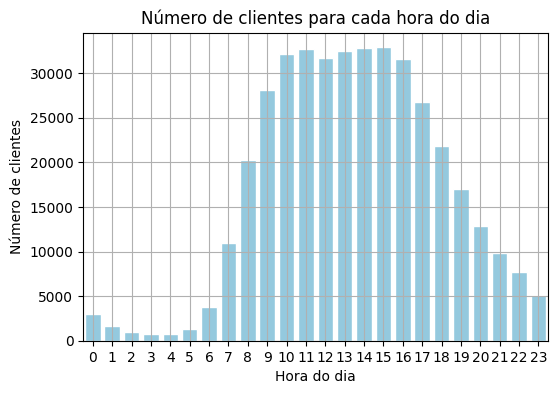

In [98]:
# Criado um gráfico para vizualizar quantas pessoas fazem pedidos a cada hora do dia.
each_order_clients = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

plt.figure(figsize=(6, 4))
sns.barplot(each_order_clients, color='skyblue', edgecolor='white')
plt.title('Número de clientes para cada hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()

#### Escreva suas conclusões aqui

``O pico de pessoas fazendo pedidos ocorre às 10h da manhã e mantém um alto fluxo até as 16h da tarde, onde posteriormente passa a ter uma queda até o final do dia.``

### [A3] Em que dia da semana as pessoas fazem compras?

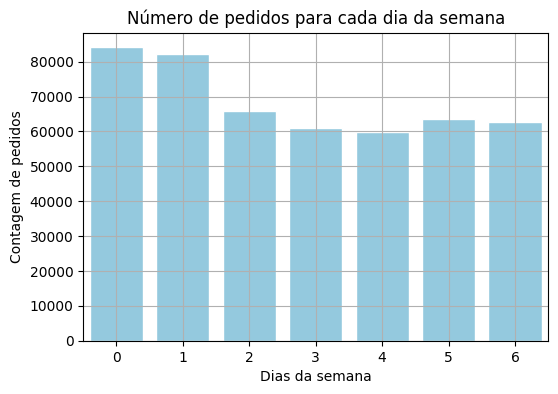

In [99]:
day_of_week_orders = df_orders.groupby('order_dow')['user_id'].count()

plt.figure(figsize=(6, 4))
sns.barplot(day_of_week_orders ,color='skyblue', edgecolor='white')
plt.title('Número de pedidos para cada dia da semana')
plt.xlabel('Dias da semana')
plt.ylabel('Contagem de pedidos')
plt.grid(True)
plt.show()

#### Escreva suas conclusões aqui

``As pessoas tendem a fazer mais compras no domingo e na segunda-feira.``

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

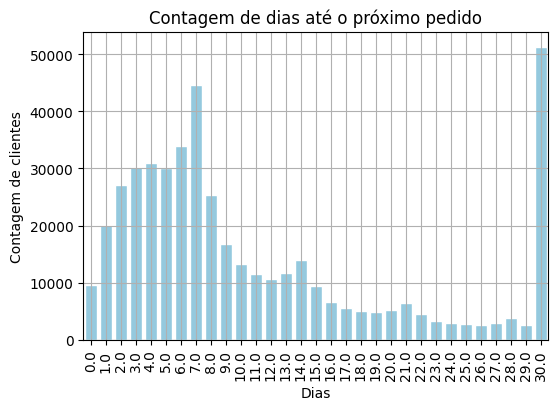

In [100]:
days_to_next_order = df_orders.groupby('days_since_prior_order')['user_id'].count()

plt.figure(figsize=(6, 4))
sns.barplot(days_to_next_order, color='skyblue', edgecolor='white')
plt.title('Contagem de dias até o próximo pedido')
plt.xlabel('Dias')
plt.ylabel('Contagem de clientes')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

#### Escreva suas conclusões aqui

``Os primeiros 7 dias do mês possuem uma alta demanda de pedidos feitos, após isso apenas no fim do mês os pedidos atingem o pico.``

``A menor demanda por pedidos acontece entre o dia 22 e o dia 30 (talvez por ser o meio do mês as pessoas deem prioridade para gastos mais necessários).``

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

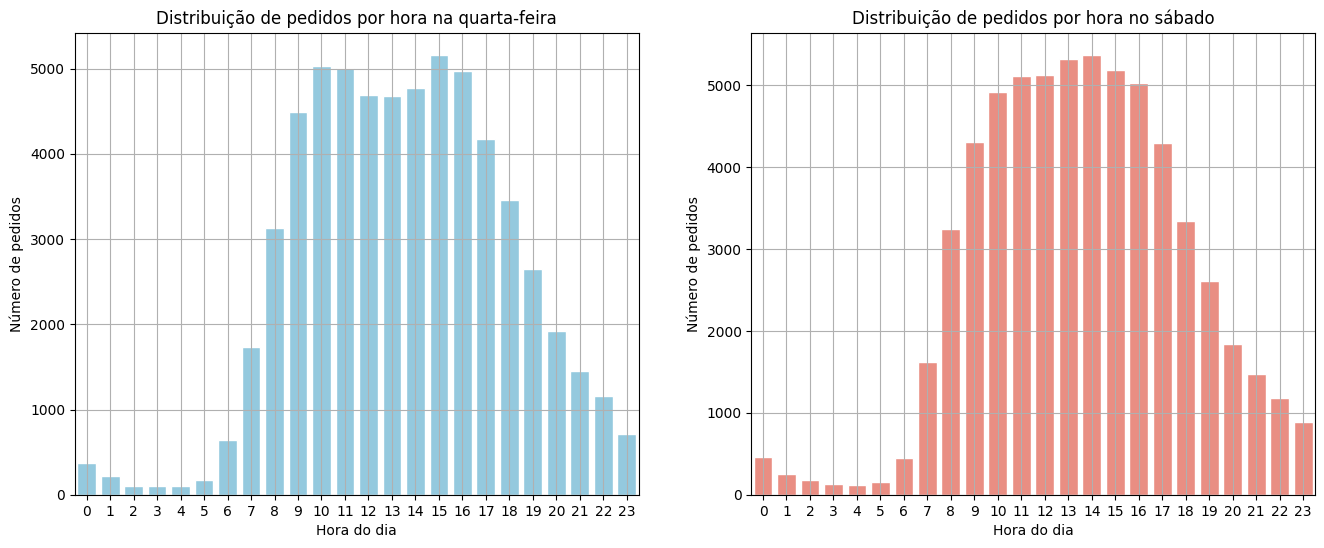

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
wednesday_orders = df_orders[df_orders['order_dow'] == 3].groupby('order_hour_of_day')['user_id'].count()
saturday_orders = df_orders[df_orders['order_dow'] == 6].groupby('order_hour_of_day')['user_id'].count()

sns.barplot(wednesday_orders, ax=ax[0], color='skyblue', edgecolor='white')
ax[0].set_title('Distribuição de pedidos por hora na quarta-feira')
ax[0].set_xlabel('Hora do dia')
ax[0].set_ylabel('Número de pedidos')
ax[0].grid(True)


sns.barplot(saturday_orders, ax=ax[1], color='salmon', edgecolor='white')
ax[1].set_title('Distribuição de pedidos por hora no sábado')
ax[1].set_xlabel('Hora do dia')
ax[1].set_ylabel('Número de pedidos')
ax[1].grid(True)

#### Escreva suas conclusões aqui

``A maior diferença entre Quarta-Feira e Sábado acontece no período entre as 11 e 15 horas.``

### [B2] Qual é a distribuição do número de pedidos por cliente?

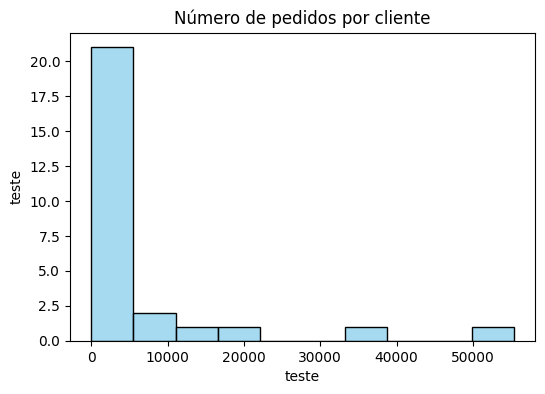

In [102]:
orders_distrib = df_orders.groupby('user_id')['order_id'].count().value_counts()

plt.figure(figsize=(6, 4))
sns.histplot(orders_distrib, color='skyblue', bins=10)
plt.title('Número de pedidos por cliente')
plt.xlabel('teste')
plt.ylabel('teste')
plt.show()

#### Escreva suas conclusões aqui

``A distribuição assimétrica para a esquerda do gráfico indica que a maioria dos clientes fazem poucos pedidos e apenas alguns poucos clientes fizeram muitos pedidos, representados pela parte direita do gráfico.``

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [103]:
top_20_products = df_op.groupby('product_id')['order_id'].count().sort_values(ascending=False).head(20).reset_index()
top_20_products

,product_id,order_id
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [104]:
top_20_products.rename(columns={'order_id': 'quantidade'}, inplace=True)

In [105]:
top_20_products.merge(df_products[['product_id','product_name']],on='product_id')

,product_id,quantidade,product_name
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


#### Escreva suas conclusões aqui

``Não há produtos industrializados entre os 20 produtos mais populares.``

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [106]:
qtd_items = df_op.groupby('order_id')['product_id'].count()
qtd_items.mean()

10.098983215049127

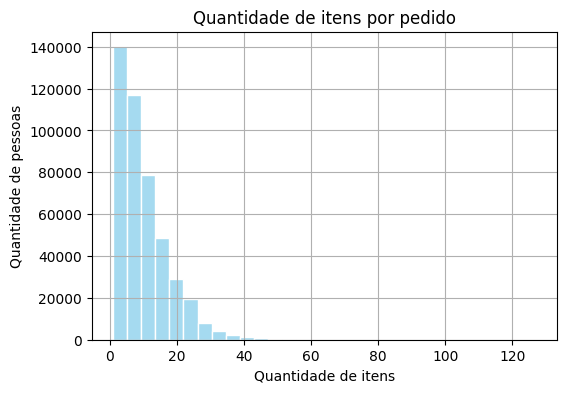

In [107]:
plt.figure(figsize=(6, 4))
sns.histplot(qtd_items, color='skyblue', bins=30, edgecolor='white')
plt.title('Quantidade de itens por pedido')
plt.xlabel('Quantidade de itens')
plt.ylabel('Quantidade de pessoas')
plt.grid(True)
plt.show()

#### Escreva suas conclusões aqui

``As pessoas costumam comprar entre 1 e 10 itens.``

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [108]:
main_itens = df_op[df_op['reordered'] == 1].groupby('product_id')['order_id'].count().sort_values(ascending=False).head(20).reset_index()

In [109]:
main_itens.columns = ['product_id','qtd_itens']

In [110]:
top_20_reordered = main_itens.merge(df_products[['product_id','product_name']],on='product_id')
top_20_reordered[['product_id', 'product_name','qtd_itens']]

,product_id,product_name,qtd_itens
0,24852,banana,55763
1,13176,bag of organic bananas,44450
2,21137,organic strawberries,28639
3,21903,organic baby spinach,26233
4,47209,organic hass avocado,23629
5,47766,organic avocado,18743
6,27845,organic whole milk,16251
7,47626,large lemon,15044
8,27966,organic raspberries,14748
9,16797,strawberries,13945


#### Escreva suas conclusões aqui

``Os 20 itens mais inclusos em pedidos repetidos são em grande maioria os mais populares também.``

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [111]:
total_orders_per_product = df_op.groupby('product_id').size()

In [112]:
reordered_orders_per_product = df_op.groupby('product_id')['reordered'].sum()

In [113]:
reorder_rate_per_product = (reordered_orders_per_product / total_orders_per_product).reset_index()
reorder_rate_per_product.columns = ['product_id', 'parcela']

In [114]:
final_table = reorder_rate_per_product.merge(df_products[['product_id', 'product_name']], on='product_id')
final_table = final_table[['product_id', 'product_name', 'parcela']]
final_table['parcela'] = final_table['parcela'].round(2)
final_table.sample(20)

,product_id,product_name,parcela
17058,18628,organic volcano rice ready to eat bowl,0.29
5720,6263,vinter's collection chardonnay,0.55
22843,24894,umcka cough max relief english ivy base,0.33
17172,18752,mega stuf,0.40
23086,25160,licorice- bite-size- strawberry & green apple,0.55
43299,47238,original recipe stewed tomatoes,0.47
38743,42283,tuna creations hot buffalo style,0.33
2185,2396,dual pack repair and protect shampoo + conditi...,0.00
32407,35341,blue sparkle fabric softener dryer sheets,0.23
14629,16006,sprouted chocolate hazelnut spread,0.67


### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [115]:
df_merged = df_op.merge(df_orders[['order_id', 'user_id']], on='order_id', how='left')
repeated_orders_per_user = df_merged[df_merged['reordered'] == 1].groupby('user_id')['reordered'].count()
total_orders_per_user = df_merged.groupby('user_id')['order_id'].count()

In [116]:
reorder_rate_per_user = (repeated_orders_per_user /total_orders_per_user).reset_index()
reorder_rate_per_user.columns = ['user_id', 'proporção']

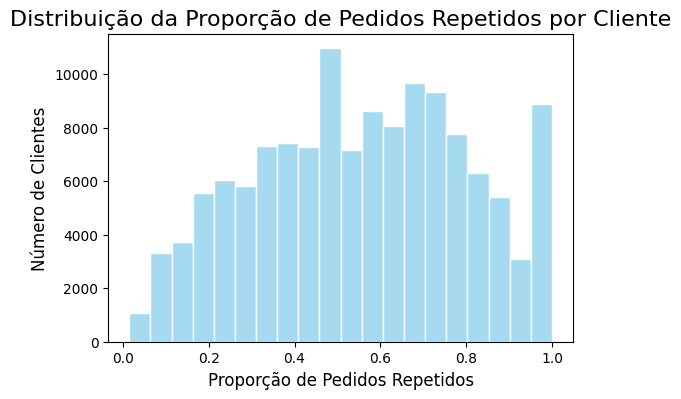

In [117]:
plt.figure(figsize=(6, 4))
sns.histplot(reorder_rate_per_user['proporção'],bins=20, color='skyblue',edgecolor='white')
plt.title('Distribuição da Proporção de Pedidos Repetidos por Cliente', fontsize=16)
plt.xlabel('Proporção de Pedidos Repetidos', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

#### Escreva suas conclusões aqui

``A maioria dos clientes repete metade de seus pedidos.Também há uma alta proporção de clientes que sempre repetem seus pedidos e é baixa a proporção de clientes que nunca repetem.``

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [118]:
first_items = df_op[df_op['add_to_cart_order'] == 1]
top_first_items = first_items['product_id'].value_counts().head(20).reset_index()

top_first_items.columns = ['product_id', 'frequência']
top_first_items = top_first_items.merge(df_products[['product_id', 'product_name']], on='product_id')

top_first_items = top_first_items[['product_id', 'product_name', 'frequência']]
top_first_items

,product_id,product_name,frequência
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


#### Escreva suas conclusões aqui

``Quase todos os produtos a serem colocados primeiro no carrinho de compra dos clientes são produtos mais saudáveis e de origens naturais.``

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os resultados para essa questão não estão corretos. Dica: verifique a necessidade de fazer o `merge` entre os `dataframes` de compras e os de produtos e/ou filtrar pela flag `add_to_cart_order`. Abaixo, apresento uma amostra do resultado esperado para essa tarefa para que você possa validar o seu trabalho 

```python
   	product_id	product_name		           count
0	24852		Banana	                         15562
1	13176		Bag of Organic Bananas	         11026
2	27845		Organic Whole Milk	             4363
3	21137		Organic Strawberries		       3946
4	47209		Organic Hass Avocado	           3390
```
</div>


# Conclusão geral do projeto:
Concluo que os hábitos de compra dos clientes da Instacart estão altamente focados em produtos saudáveis e de origem natural. Ao longo do projeto é possível notar que frutas, verduras e alimentos orgânicos possuem uma alta demanda por parte dos clientes da Instacart, e não só a popularidade desses produtos como a ordem que são colocados no carrinho de compras comprovam esses fatos.